# Import library

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Load dataset

In [2]:
df = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/test.csv')

# Descriptive statistics

In [3]:
# Sample of the dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Statistics on numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Variable survived

In [6]:
# Proportion of people that surviced
df['Survived'].value_counts()/len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

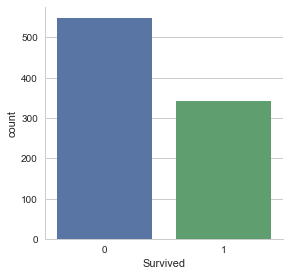

In [7]:
sns.factorplot("Survived", data=df, kind="count");

### Variable Pclass

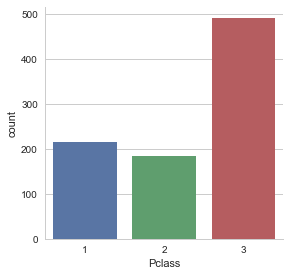

In [8]:
sns.factorplot("Pclass", data=df, kind="count");

### Variable Sex

In [9]:
# Proportion of people that surviced
df['Sex'].value_counts()/len(df)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

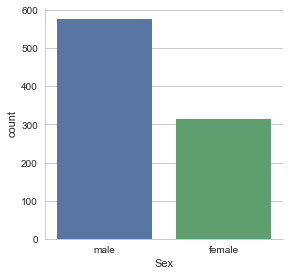

In [10]:
sns.factorplot("Sex", data=df, kind="count");

### Variable Age

In [11]:
df['Age'].isnull().sum()

177

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


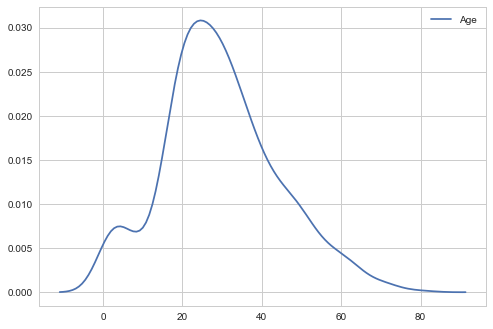

In [12]:
sns.kdeplot(df['Age'])

### Variable SibSp

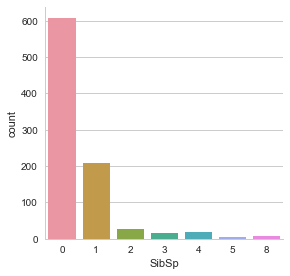

In [13]:
sns.factorplot("SibSp", data=df, kind="count");

### Variable Fare

In [14]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

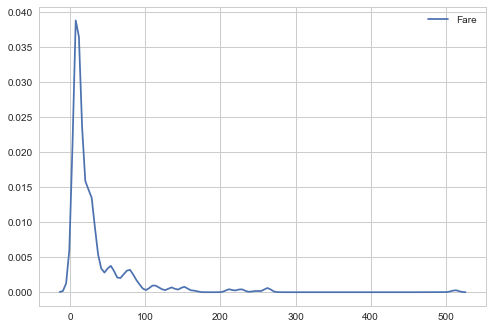

In [15]:
sns.kdeplot(df['Fare'])

### Variable Embarked

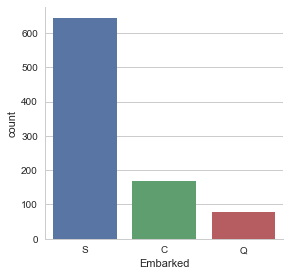

In [16]:
sns.factorplot("Embarked", data=df, kind="count")

### Survived compared to sex

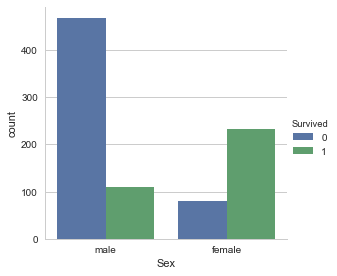

In [17]:
sns.factorplot("Sex", data=df, hue="Survived", kind="count")

### Survived compared to pclass

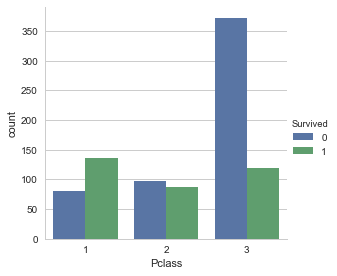

In [18]:
sns.factorplot("Pclass", data=df, hue="Survived", kind="count")

# Feature engineering

### Merge all datasets

In [19]:
# Merge train and validation dataset
df_Y = df['Survived']
combined_X = df.drop('Survived',1).append(validation)

In [20]:
# Global dataset
combined_X.shape

(1309, 11)

### Cleaning

In [21]:
# Fill NA for age by the median
combined_X['Age'].fillna(value=combined_X['Age'].median(), inplace=True)

### New features

#### Age of the passenger

In [22]:
combined_X['Sex'] = combined_X['Sex'].map({'male':1,'female':0})

#### Title of the passenger

In [23]:
# Get the title
combined_X['Title'] = combined_X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
# Display the modalities of titles
combined_X['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Title, dtype: int64

In [25]:
# Reduce the number of titles
combined_X['Title'].replace(['Capt','Col','Major','Dr','Rev'],'Officer',inplace=True)
combined_X['Title'].replace(['Jonkheer','Don','Sir','the Countess','Dona','Lady'],'Royalty',inplace=True)
combined_X['Title'].replace(['Mme','Ms','Mrs'],'Mrs',inplace=True)
combined_X['Title'].replace('Mlle','Miss',inplace=True)

In [26]:
# Generate dummies
title_dummies = pd.get_dummies(combined_X['Title'],prefix='Title')

In [27]:
# Insert dummies in the dataframe (axis=0:index, axis=1:columns)
combined_X = pd.concat([combined_X,title_dummies], axis=1)

#### Fare of the ticket

In [28]:
combined_X.loc[combined_X['Fare'] < 10,'FareType']='<10'
combined_X.loc[((combined_X['Fare'] >= 10) & (combined_X['Fare'] < 20)),'FareType']='10-20'
combined_X.loc[((combined_X['Fare'] >= 20) & (combined_X['Fare'] < 30)),'FareType']='20-30'
combined_X.loc[combined_X['Fare'] > 30,'FareType']='>30'

In [29]:
# Generate dummies
fare_dummies = pd.get_dummies(combined_X['FareType'],prefix='Fare')

In [30]:
# Insert dummies in the dataframe
combined_X = pd.concat([combined_X,fare_dummies], axis=1)

#### City of embarkation

In [31]:
city_dummies = pd.get_dummies(combined_X['Embarked'],prefix='City')
combined_X = pd.concat([combined_X,city_dummies], axis=1)

# Machine learning

In [32]:
# Import librairies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [33]:
# Select features
combined_X = combined_X.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked','Title','FareType'],axis=1)

In [34]:
# Retrieve train and validation dataset
df_X = combined_X[0:891]
validation_X = combined_X[891:]

In [35]:
# Split train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

In [36]:
# Train a random forest algorithm
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
# Predict on test dataset
Y_proba = clf.predict(X_test)

In [38]:
# Get score on test dataset
print 'AUC value:', roc_auc_score(Y_test, Y_proba)

AUC value: 0.818468468468


In [39]:
# Display features of importance
zip(combined_X.columns,clf.feature_importances_)

[('Pclass', 0.10336026723220737),
 ('Sex', 0.10407047597062995),
 ('Age', 0.28999429846699587),
 ('SibSp', 0.055579303890207862),
 ('Parch', 0.050978097477606774),
 ('Title_Master', 0.0095884721331137082),
 ('Title_Miss', 0.016261873506578605),
 ('Title_Mr', 0.15517984507667359),
 ('Title_Mrs', 0.068737039913056061),
 ('Title_Officer', 0.018794690873282022),
 ('Title_Royalty', 3.327371014719633e-06),
 ('Fare_10-20', 0.016174920240221886),
 ('Fare_20-30', 0.016108506435409078),
 ('Fare_<10', 0.022213593877637099),
 ('Fare_>30', 0.023574546407805132),
 ('City_C', 0.017038146150907822),
 ('City_Q', 0.01426489698021636),
 ('City_S', 0.018077697996436003)]

# Test on Kaggle

In [40]:
# Predict on validation datset
validation_Y = clf.predict(validation_X)

In [41]:
# Output result on a csv file
output = pd.DataFrame()
output['PassengerId'] = validation['PassengerId']
output['Survived'] = validation_Y
output[['PassengerId','Survived']].to_csv('output.csv',index=False)